# Travel Time Measures

In [1]:
import sys, os
os.chdir('scripts')
from CommunityAnalytics import *

In [2]:
%matplotlib inline

<a id='overview'></a>

In [3]:
tt=TTMetrics(network_type='walk',
             sp_matrix_filename='data/matrices/walk_asym_health_tracts.csv',
             source_filename='data/ORIG/tracts2010.csv',
             dest_filename='data/DEST/health_chicago.csv')

The variables in your data set are:
>  geoid10
>  lon
>  lat
>  Pop2014
>  Pov14
>  community
If you have no population variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
The variables in your data set are:
>  ID
>  Facility
>  lat
>  lon
>  Type
>  target
>  category
>  community
If you have no target variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
If you have no category variable, write "skip" (no quotations)


INFO:ScoreModel:Loaded sp matrix from file: data/matrices/walk_asym_health_tracts.csv
INFO:ScoreModel:Finished loading sp_matrix in 0.14 seconds
INFO:ScoreModel:Processing... This could take a while
INFO:ScoreModel:Finished processing ModelData in 0.06 seconds


In [4]:
tt.calculate()

## Count of Nearby Destinations

In [5]:
#Use .n_dests_in_range to estimate the number of facilities by category within a buffer (time defined in upper)
tt.n_dests_in_range.to_csv('data/other_metrics/nd_health_tracts.csv')

In [6]:
tt.n_dests_in_range.head()

,All Free Health Clinics,School-Based Health Centers,Other Health Providers,Federally Qualified Health Centers,Hospitals
17031010100,0.0,0.0,0.0,4.0,1.0
17031010201,0.0,0.0,0.0,4.0,1.0
17031010202,0.0,1.0,1.0,4.0,1.0
17031010300,0.0,1.0,0.0,5.0,0.0
17031010400,0.0,1.0,1.0,3.0,1.0


**Results of count of nearby destinations by category**

<img src="scripts/data/figures/nd.png" width="1800" title="Optional title"  align="center">

## Time to Closest Destination

In [7]:
#Use .near_nbr to create the time to the nearest neighbor within a buffer (time defined in upper)
tt.near_nbr.to_csv('data/other_metrics/nn_health_tracts.csv')

In [8]:
tt.near_nbr.head()

,Hospitals,Federally Qualified Health Centers,School-Based Health Centers,All Free Health Clinics,Other Health Providers
17031010100,1195.0,200.0,1893.0,3140.0,2008.0
17031010201,1010.0,469.0,1867.0,2377.0,1926.0
17031010202,1493.0,457.0,1569.0,2852.0,1672.0
17031010300,1802.0,531.0,1712.0,3234.0,1827.0
17031010400,1407.0,950.0,1239.0,2882.0,1347.0


**Results of time to nearest destination by category**

<img src="scripts/data/figures/nn.png" width="1800" title="Optional title"  align="center">

**Empirical Cumulative Distribution Function Plots**

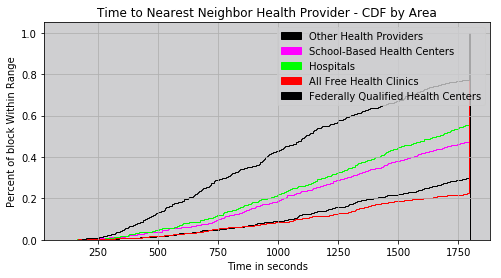

INFO:ScoreModel:Plot was saved to: data/figures/fig_4.png


In [5]:
tt.plot_nearest_providers(limit_categories=None,
                              n_bins=300,
                              resolution='block',
                              title="Time to Nearest Neighbor Health Provider - CDF by Area")

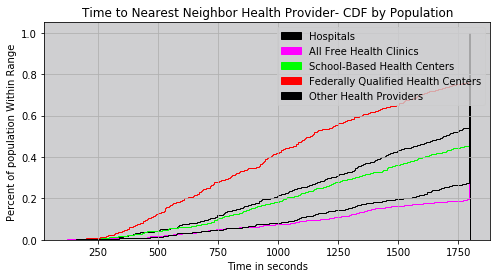

INFO:ScoreModel:Plot was saved to: data/figures/fig_5.png


In [5]:
tt.plot_nearest_providers(limit_categories=None,
                              n_bins=300,
                              resolution='population',
                              title="Time to Nearest Neighbor Health Provider- CDF by Population")

Other metrics results are saved under Access_health_tracts.shp.  
The prefix nd stands for the count of nearby destinations metric and the prefix nn stands for the time to the closest destination.

Should I add maps of nearest neighbors and counts by type one next to each other?